In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
import os

## Step 3: Dataset Preparation


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
)

train_data = train_datagen.flow_from_directory(
    "dataset/train",
    target_size=(128, 128),
    batch_size=32,
    class_mode="binary",
    subset="training",
)

val_data = train_datagen.flow_from_directory(
    "dataset/train",
    target_size=(128, 128),
    batch_size=32,
    class_mode="binary",
    subset="validation",
)

## Step 4: Build and Train CNN


In [ ]:
model = Sequential(
    [
        Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation="relu"),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation="relu"),
        Dropout(0.5),
        Dense(1, activation="sigmoid"),
    ]
)

model.compile(optimizer=Adam(0.001), loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

history = model.fit(train_data, validation_data=val_data, epochs=15, verbose=1)

## Step 5: Visualize Training Performance


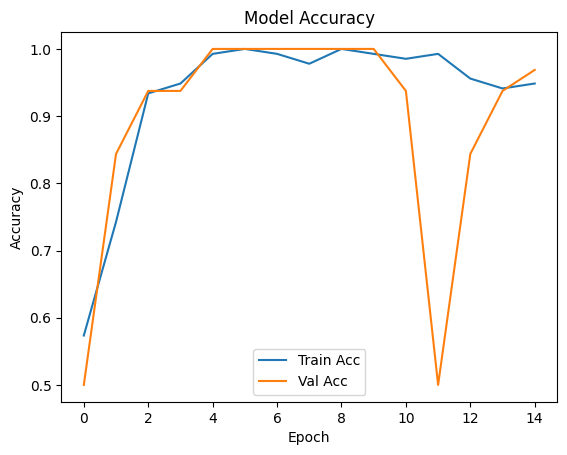

In [17]:
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Step 6: Evaluate and Predict


In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_data = test_datagen.flow_from_directory(
    "dataset/test", target_size=(128, 128), batch_size=32, class_mode="binary"
)

test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.2f}")

In [ ]:
import glob
from tensorflow.keras.preprocessing import image
import numpy as np

# Create a mapping from class index to label
idx_to_class = {v: k for k, v in train_data.class_indices.items()}

test_folder = r"D:\Part-IV\AI Lab\assignment-6\dataset\test"

for cls in ["onion", "garlic"]:
    paths = glob.glob(f"{test_folder}\\{cls}\\*.jpg")
    for path in paths:
        img = image.load_img(path, target_size=(128, 128))
        img_array = np.expand_dims(image.img_to_array(img) / 255.0, axis=0)

        pred = model.predict(img_array)[0][0]
        # Convert prediction to class index: 0 or 1
        pred_class = 1 if pred > 0.5 else 0

        print(f"{path}: {idx_to_class[pred_class].capitalize()}")